In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy
import csv
from scipy import stats

TopArtistCSV = '../Input/countriesTopArtist.csv'

#sample csv read
artistCSVDF = pd.read_csv(TopArtistCSV, encoding='UTF8')
artistCSVDF

,name,listeners,mbid,country
0,The xx,2090127,c5c2ea1c-4bde-4f4d-bd0b-47b200bf99d6,AFGHANISTAN
1,The Beatles,4082721,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,AFGHANISTAN
2,Radiohead,5094619,a74b1b7f-71a5-4011-9441-d0b5e4122711,AFGHANISTAN
3,Lana Del Rey,2352583,b7539c32-53e7-4908-bda3-81449c367da6,AFGHANISTAN
4,Pink Floyd,3399905,83d91898-7763-47d7-b03b-b92132375c47,AFGHANISTAN
...,...,...,...,...
9561,Eminem,4966239,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,UNITED KINGDOM
9562,Kings of Leon,3652328,6ffb8ea9-2370-44d8-b678-e9237bbd347b,UNITED KINGDOM
9563,Lana Del Rey,2352583,b7539c32-53e7-4908-bda3-81449c367da6,UNITED KINGDOM
9564,Ariana Grande,1681258,f4fdbb4c-e4b7-47a0-b83b-d91bbfcfa387,UNITED KINGDOM


In [6]:
# Importing country GDP data from https://worldpopulationreview.com/countries/countries-by-gdp

GDP_csv = '../Input/GDP.csv'
GDP_df = pd.read_csv(GDP_csv)
GDP_df

,rank,country,imfGDP,unGDP,gdpPerCapita,pop
0,1,United States,2.219810e+13,1.862450e+13,66678.0263,332915.073
1,2,China,1.546810e+13,1.121830e+13,10710.3777,1444216.107
2,3,Japan,5.495420e+12,4.936210e+12,43596.8659,126050.804
3,4,Germany,4.157120e+12,3.477800e+12,49548.2308,83900.473
4,5,India,3.257720e+12,2.259640e+12,2337.9495,1393409.038
...,...,...,...,...,...,...
206,207,Pakistan,0.000000e+00,2.825060e+11,1254.4675,225199.937
207,208,Anguilla,0.000000e+00,3.375205e+08,22327.2124,15.117
208,209,Sudan,0.000000e+00,8.288740e+10,1845.6600,44909.353
209,210,Syria,0.000000e+00,2.216308e+10,1212.7072,18275.702


In [7]:
# 196 countries in artist csv
# 211 countries in GDP data

# artistCSVDF['country'] 
GDP_df['country'] = GDP_df['country'].str.title()
artistCSVDF['country'] = artistCSVDF['country'].str.title()

GDP_artist_df = artistCSVDF.merge(GDP_df, how='left')

# Removing rows where gdpPerCapita equals NaN
GDP_artist_df = GDP_artist_df[pd.to_numeric(GDP_artist_df['gdpPerCapita'],errors='coerce').notna()]


GDP_artist_df

,name,listeners,mbid,country,rank,imfGDP,unGDP,gdpPerCapita,pop
0,The xx,2090127,c5c2ea1c-4bde-4f4d-bd0b-47b200bf99d6,Afghanistan,116.0,2.068200e+10,2.023506e+10,519.1861,39835.428
1,The Beatles,4082721,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,Afghanistan,116.0,2.068200e+10,2.023506e+10,519.1861,39835.428
2,Radiohead,5094619,a74b1b7f-71a5-4011-9441-d0b5e4122711,Afghanistan,116.0,2.068200e+10,2.023506e+10,519.1861,39835.428
3,Lana Del Rey,2352583,b7539c32-53e7-4908-bda3-81449c367da6,Afghanistan,116.0,2.068200e+10,2.023506e+10,519.1861,39835.428
4,Pink Floyd,3399905,83d91898-7763-47d7-b03b-b92132375c47,Afghanistan,116.0,2.068200e+10,2.023506e+10,519.1861,39835.428
...,...,...,...,...,...,...,...,...,...
9561,Eminem,4966239,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,United Kingdom,6.0,2.927080e+12,2.647900e+12,42914.5839,68207.116
9562,Kings of Leon,3652328,6ffb8ea9-2370-44d8-b678-e9237bbd347b,United Kingdom,6.0,2.927080e+12,2.647900e+12,42914.5839,68207.116
9563,Lana Del Rey,2352583,b7539c32-53e7-4908-bda3-81449c367da6,United Kingdom,6.0,2.927080e+12,2.647900e+12,42914.5839,68207.116
9564,Ariana Grande,1681258,f4fdbb4c-e4b7-47a0-b83b-d91bbfcfa387,United Kingdom,6.0,2.927080e+12,2.647900e+12,42914.5839,68207.116


In [8]:
grouped_GDP_Artist = GDP_artist_df.groupby('country')

GDP_per_capita = grouped_GDP_Artist['gdpPerCapita'].mean()
listeners_per_country = grouped_GDP_Artist['listeners'].sum()

# GDP_per_capita
# listeners_per_country



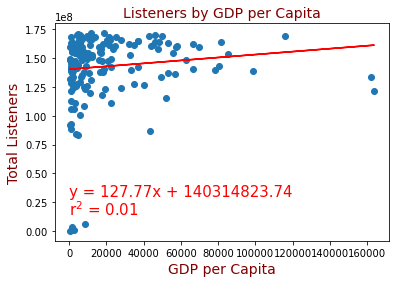

In [9]:
# Generating scatter plot
plt.scatter(GDP_per_capita, listeners_per_country)


plt.xlabel('GDP per Capita', color="maroon", size='14')
plt.ylabel('Total Listeners', color="maroon", size='14')
plt.title('Listeners by GDP per Capita', color="maroon", size='14')
plt.yticks()


plt.yscale(value='linear')


# Running linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(GDP_per_capita, listeners_per_country)

regress_values = GDP_per_capita * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

# Linear Regression of the GDP per capita and number of listeners
r_sq = rvalue * rvalue
r_sq_text = f'r$^2$ = {round(r_sq,2)}'

plt.plot(GDP_per_capita, regress_values, 'r-')
plt.annotate(line_eq,(20,30000000),fontsize=15, color='red')
plt.annotate(r_sq_text,(20,14000000),fontsize=15, color='red')


plt.show()

In [10]:
import gmaps

country_genre_csv = '../Input/genre_country_df.csv'

#sample csv read

coord_df = pd.read_csv(country_genre_csv)
coord_df

,country,name_genre,total listeners,country_code,latitude,longitude
0,AFGHANISTAN,rock,58149382,AF,33.939110,67.709953
1,AFGHANISTAN,electronic,18061603,AF,33.939110,67.709953
2,AFGHANISTAN,pop,14996276,AF,33.939110,67.709953
3,AFGHANISTAN,alternative,14078259,AF,33.939110,67.709953
4,AFGHANISTAN,blues,6579549,AF,33.939110,67.709953
...,...,...,...,...,...,...
922,ZIMBABWE,rock,60324479,ZW,-19.015438,29.154857
923,ZIMBABWE,pop,23451486,ZW,-19.015438,29.154857
924,ZIMBABWE,alternative,16529486,ZW,-19.015438,29.154857
925,ZIMBABWE,rap,16355404,ZW,-19.015438,29.154857


In [11]:
grouped_coords = coord_df.groupby(['country','name_genre']).sum()
grouped_coords['total listeners'].sort_values(ascending=False)
grouped_coords

total listeners   latitude  longitude
country     name_genre                                        
AFGHANISTAN alternative         14078259  33.939110  67.709953
            blues                6579549  33.939110  67.709953
            electronic          18061603  33.939110  67.709953
            pop                 14996276  33.939110  67.709953
            rock                58149382  33.939110  67.709953
...                                  ...        ...        ...
ZIMBABWE    alternative         16529486 -19.015438  29.154857
            electronic          15778958 -19.015438  29.154857
            pop                 23451486 -19.015438  29.154857
            rap                 16355404 -19.015438  29.154857
            rock                60324479 -19.015438  29.154857

[927 rows x 3 columns]

In [12]:
# Plotting map and adding heat layer
fig = gmaps.figure()

cc = coord_df.groupby(['country']).cumcount() + 1
coordFlat_df = coord_df.set_index(['country', cc]).unstack().sort_index(1, level=1)
coordFlat_df.columns = ['_'.join(map(str,i)) for i in coordFlat_df.columns]
coordFlat_df.reset_index()

infoBoxTemplate = """
<dl>
<dt>#1</dt><dd>{name_genre_1}</dd>
<dt>#2</dt><dd>{name_genre_2}</dd>
<dt>#3</dt><dd>{name_genre_3}</dd>
<dt>#4</dt><dd>{name_genre_4}</dd>
<dt>#4</dt><dd>{name_genre_5}</dd>
</dl>
"""
top5 = [infoBoxTemplate.format(**row) for index, row in coordFlat_df.iterrows()]

country_lats = coord_df['latitude']
country_lngs = coord_df['longitude']

country_coords = list(zip(country_lats, country_lngs))

markers = gmaps.marker_layer(country_coords)#, info_box_content=top5)


fig.add_layer(markers)


# Display figure
fig


Figure(layout=FigureLayout(height='420px'))

In [14]:
artist_of_country_df = pd.read_csv('../Input/countriesTopArtist.csv')
artist_of_country_df

,name,listeners,mbid,country
0,The xx,2090127,c5c2ea1c-4bde-4f4d-bd0b-47b200bf99d6,AFGHANISTAN
1,The Beatles,4082721,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,AFGHANISTAN
2,Radiohead,5094619,a74b1b7f-71a5-4011-9441-d0b5e4122711,AFGHANISTAN
3,Lana Del Rey,2352583,b7539c32-53e7-4908-bda3-81449c367da6,AFGHANISTAN
4,Pink Floyd,3399905,83d91898-7763-47d7-b03b-b92132375c47,AFGHANISTAN
...,...,...,...,...
9561,Eminem,4966239,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,UNITED KINGDOM
9562,Kings of Leon,3652328,6ffb8ea9-2370-44d8-b678-e9237bbd347b,UNITED KINGDOM
9563,Lana Del Rey,2352583,b7539c32-53e7-4908-bda3-81449c367da6,UNITED KINGDOM
9564,Ariana Grande,1681258,f4fdbb4c-e4b7-47a0-b83b-d91bbfcfa387,UNITED KINGDOM


In [16]:
# artist_country_group = artist_of_country_df.groupby(['country', 'name']).sum()

# artist_country_group = artist_of_country_df.sort_values(['listeners'], ascending=False).groupby(['country','name']).head(4)

# artist_country_group.head(20)

header = True
mode = 'w'

artist_of_country_df = pd.read_csv('../Input/countriesTopArtist.csv')
artist_of_country_df

artist_country_group = artist_of_country_df.groupby(['country','name']).agg(**{"total listeners":("listeners", "sum")}).reset_index()

artist_country_sorted = artist_country_group.set_index(['name']).groupby('country')['total listeners'].nlargest(1).reset_index()

# top_artists = pd.merge(topGenresSorted, countryCoordDF, on="country")
# with open(countriesTopGenres, mode) as f:
#     topGenreCoords.to_csv(f, header=header)

artist_country_sorted.head()
# artist_country_sorted = artist_country_sorted[artist_country_sorted['name'] =='Radiohead']
artist_country_sorted

,country,name,total listeners
0,AFGHANISTAN,Radiohead,5094619
1,ALBANIA,Coldplay,5816762
2,ALGERIA,Coldplay,5816762
3,AMERICAN SAMOA,Radiohead,5094619
4,ANDORRA,Coldplay,5816762
...,...,...,...
191,"VIRGIN ISLANDS, U.S.",Coldplay,5816762
192,YEMEN,Coldplay,5816762
193,ZAMBIA,Coldplay,5816762
194,ZIMBABWE,Coldplay,5816762


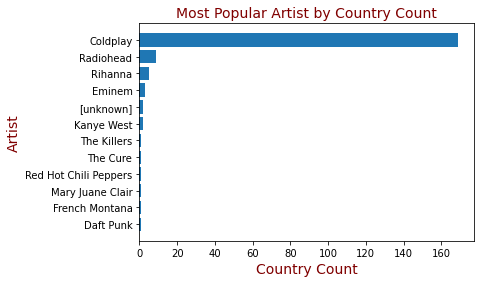

In [17]:
best_df = artist_country_sorted.groupby('name').count().reset_index().sort_values('country')
best_df

plt.barh(best_df['name'], best_df['country'])

plt.xlabel('Country Count', color="maroon", size='14')
plt.ylabel('Artist', color="maroon", size='14')
plt.title('Most Popular Artist by Country Count', color="maroon", size='14')



plt.show()

In [21]:
artist_replay_df = pd.read_csv('../Input/artist.csv')
artist_replay_df.head()

,Unnamed: 0,name_genre,name,stats.listeners,stats.playcount,streamable
0,0,rock,The xx,2090416,150725339,0
1,0,pop,The Beatles,4083670,582082979,0
2,0,electronic,Radiohead,5095496,559907557,0
3,0,alternative,Lana Del Rey,2353626,318330247,0
4,0,rock,Pink Floyd,3400694,350538325,0


In [22]:
artist_replay_df['replayability'] = artist_replay_df['stats.playcount'] / artist_replay_df['stats.listeners']
artist_replay_df.sort_values('replayability', ascending=False)

top_artist_replayability = artist_replay_df[artist_replay_df['stats.listeners'] > 1000000]
top_artist_replayability = top_artist_replayability.sort_values('replayability', ascending=False).head(10)

top_artist_replayability = top_artist_replayability.sort_values('replayability')

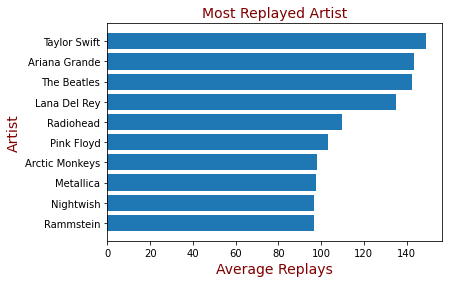

In [23]:
replayable_artists = top_artist_replayability['name']
replays = top_artist_replayability['replayability']

plt.barh(replayable_artists, replays)

plt.xlabel('Average Replays', color="maroon", size='14')
plt.ylabel('Artist', color="maroon", size='14')
plt.title('Most Replayed Artist', color="maroon", size='14')
plt.tight_layout
plt.savefig('../Output/MostReplayedArtist.png')

plt.show()